# It’s Not a Matter of If, It’s a Matter of Huyện
## Cutting the Red Tape for New Businesses in Vietnam: A Panel Study Using R


In 2009, Vietnam halted the operation of People's Councils in ten provinces, 
specifically chosen as a quasi-random sampling, in order to statistically 
assess the effects of recentralization on service provision and corruption. 
In this project, I will test whether removing an extra step in the hierarchy of specific provinces may have also
simplified new business registration in those areas, cutting new business 
registration times. This result would suggest that further recentralization of 
power to the provincial level would improve the efficiency of bureaucracy in 
dealing with business startups.

### Introduction

In April of 2009, Vietnam took the historic step of abolishing all People's Councils in __[67 districts, 32 urban districts, and 483 wards throughout ten of its provinces](https://asiafoundation.org/resources/pdfs/MunicipalGovermentinVN.pdf)__, chosen as a quasi-random sampling, in order to statistically assess the effects of recentralization on service provision and corruption through panel data from a survey called the Provincial Competitiveness Index (PCI). All power originally held by district councils was moved up the hierarchy to provincial governments. The ten treatment provinces were chosen across region, urbanization, access to borders, and other factors, and were deemed by Dr. Edmund Malesky, a well-known econometrist and Southeast Asianist, to be an adequate substitute for a randomized control trial. Working with Dr. Malesky, at that time a professor at my alma mater, UC San Diego's School of International Relations and Pacific Studies, the Vietnamese Government found that __[recentralized provinces provided better services (infrastructure, education, health, etc.) at statistically significant levels, and also suffered lower corruption rates after having removed their district councils, and when compared to provinces which had kept their district councils](https://pdfs.semanticscholar.org/f4a4/e47eaf7a70296ab889dcd5ad0f531f9f9e31.pdf)__, and in 2012, __[the Ministry of Home Affairs used findings from the PCI to propose three permanent options to restructure local governance](https://asiafoundation.org/resources/pdfs/MunicipalGovermentinVN.pdf)__. However, despite __[a late-2016 government-funded report suggested People's Councils look into the PCI to determine if procedures at the local level are lengthening business registration times and thereby increasing their costs](http://eng.pcivietnam.org/uploads/96646-PCI%20USER%20GUIDE_Final_Website.pdf)__, no such study appears to have been published linking recentralization of power to ease of new business registrations. For my advanced quantitative methods course in graduate school in the Spring of 2013, I saw a great opportunity to take advantage of this close-to-ideal “natural experiment” in recentralization policy, and explore whether more localized government makes business regulation more efficient or less. Now, in 2018 as __[Hanoi joins Ho Chi Minh City and Da Nang in moving to centralize authority under city-level governance](https://vietnam.vnanet.vn/english/hanoi-may-dissolve-district-peoples-councils/358385.html)__ in line with __[one of the solutions proposed by the Ministry of Home Affairs in their 2012 presentation](https://asiafoundation.org/resources/pdfs/MunicipalGovermentinVN.pdf)__, I am revisiting the project, updating it to incorporate data that has since become available, seeing if my old findings continue to hold true after 2012, and converting it to execute in R instead of Stata for reproducability through my GitHub repository.

### Literature Review
The literature concerning the relationship of district councils and business in Vietnam is slim and inconclusive. A __[2013 Asia Foundation paper](https://asiafoundation.org/resources/pdfs/MunicipalGovermentinVN.pdf)__ reported a wide discrepency in the opinions of surveyed businesspeople in Da Nang and Ho Chi Minh City, where the former were largely satisfied with their interactions with local-level government whereas the latter compalined of long waiting times for approvals by local councils and a lack of clarity on which level body to contact within government for specific tasks. Literature on recentralization of power and business climates elsewhere in the Asia Pacific region are similarly mized. In particular, __[“Decentralization and Recentralization,” (Gershberg & Jacobs, 1998)](https://www.iadb.org/res/publications/pubfiles/pubWP-379.pdf)__, suggests that decentralization improves efficiency and cuts unnecessary red tape,  although theory from __[“Regional Competitiveness in Indonesia” (Titrosuharto, 2010)](http://www.worldscientific.com/doi/abs/10.1142/S1793993310000160?jour=&)__ and __[“Fiscal Decentralization, Macroeconomic Conditions and Economic Growth in Australia” (Bodman, Campbell, Heaton, & Hodge, 2009)](http://www.uq.edu.au/economics/mrg/2609.pdf)__ suggest the opposite. Only the third of these papers employs panel data, but only explores economic growth, not business startup costs. Once again, our best background research of a quantitative nature may be Dr. Malesky’s report, which suggests a general decline in red tape costs through decreasing bureaucracy in treatment provinces. There is significant room therefore for a panel data study specifically on whether recentralization decreases business startup costs, with implications on the effects of de- and recentralization in general on affecting the business climate for new ventures.

### Data Choice

Vietnam's pilot program since 2009 provided as ideal an experiment as one is likely to find in political science, as Vietnam's model of local government was uniform throught the country, regardless of urban/rural, regional, geographic, or other differences before the pilot. For this study, I went first to __[the Vietnam Provincial Competitiveness Index (PCI)](http://eng.pcivietnam.org/)__  website, where annual reports compile survey results of businesspeople in over 8,000 firms in Vietnam over all 63 provinces and municipalities from 2006 through 2016 (although there is a link to data from 2005, the data cannot be found). Among the nine 
blanket indicators, entry costs, and particularly the subcategory of average number of days to register a new business, 
seemed like a relatively concrete stand-in for ease of starting new businesses, and seemed reasonably likely to be correlated with the presence of absence of district councils in 
the 10 set provinces. The idea is that as a middle-step governing body is removed, removing 
a potential veto gate, businesses will face less red tape, and therefore quicker approval for 
new ventures. My second data source was __[Dr. Malesky’s earlier report](https://pdfs.semanticscholar.org/f4a4/e47eaf7a70296ab889dcd5ad0f531f9f9e31.pdf)__, from which I recorded 
which provinces had undergone treatment, and which provincial-level bodies are considered 
“municipalities.” Municipalities comprise Vietnam's most urban areas, and their difference with rural areas likely needs to be accounted for in any regression. I created dummies for the treatment group, with the first observations in 
2009, although __[the treatment of dropping district-level governance began in April of that 
year](https://pdfs.semanticscholar.org/f4a4/e47eaf7a70296ab889dcd5ad0f531f9f9e31.pdf)__. I also went to __[the website of the General Statistics Office of Vietnam](http://www.gso.gov.vn/default_en.aspx?tabid=491)__, from where I 
downloaded data on FDI, focusing on the number of FDI-backed projects registered in each 
province in each year. Unfortunately, the General Statistics Office only offered data on FDI by province through 2011, the same range of time I used in my original paper, plus one new year for 2016 (missing data for a few provinces). I therefore decided to initially run my experiment on the years 2006 through 2011, using the available data from 2016 as a robustness check on the trends found in the former. My thinking in choosing the number of registered FDI projects per province as a variable was that the 
size of a project was likely largely irrelevant to paperwork and registration time, as large 
and small projects alike generally undergo similar bureaucratic processes. More relevant was 
the number of foreign-funded projects being registered, since the volume of paperwork may 
backlog and cause longer waiting periods to register a business. I assumed that a higher rate of 
FDI registration likely correlates with a higher rate of overall business registrations in a 
province. 

### Data Cleaning and Preparation

Before merging this data in STATA from Excel, I added zeroes to the provinces with no FDI project 
registrations (no registrations in a province in given year should be a zero, not a 
non-observation). In 2008, __[Ha Tay province was merged into the economically and 
demographically much-larger neighboring Hanoi municipality](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1669718)__, and continues to appear as a small 
fraction of the data and scores comprising the “Hanoi Municipality” in data from 2009-2012. 
As Hanoi was not one of the provinces that underwent the treatment, I'm excluding Ha Tay from my model. This is in line with practices by Dr. Malesky, who __[only 
recognized 63 provinces in his model](https://pdfs.semanticscholar.org/f4a4/e47eaf7a70296ab889dcd5ad0f531f9f9e31.pdf)__, __[although technically Ha Tay existed as a separate unit until 
August of 2008](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1669718)__. This omission could potentially cause either 
positive or negative bias in my betas, though the most obvious effect in theory would probably be positively biasing the control group: Any small boost in total FDI project numbers for Hanoi gained by merging with another province would add a positive bias to the control group as a whole, meaning positive findings for the treatment could be even more robust than reported in this study. According to a 2006 report on the Vietnam PCI by USAID, discrepancies in the definition of waiting periods in the PCI methodology were not clarified in the survey until __[the 2007 survey](https://asiafoundation.org/resources/pdfs/VNPCI2006Report.pdf)__. A quick look at the data revealed abnormally long wait times for 2006:



Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


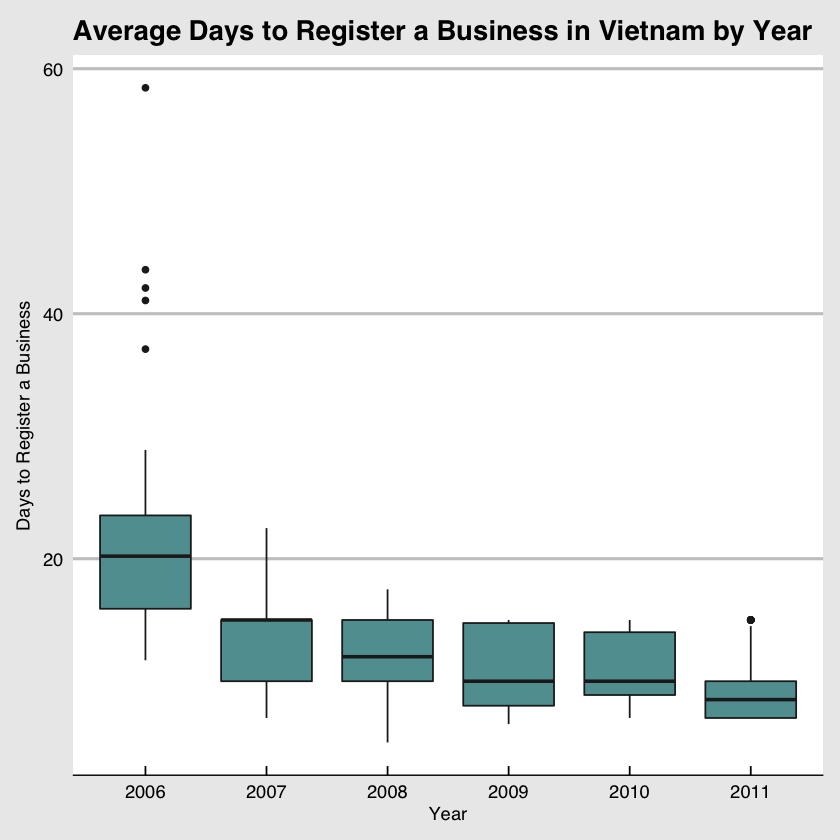

In [37]:
#Check PCI scores for discrepancies before 2007
PCImaster = read.csv("/Users/brianfriederich/Desktop/huyenproj/Datasets/CSVFinal/PCImaster.csv", header = T)
library(ggplot2)
install.packages("ggthemes")
library(ggthemes)
ggplot(PCImaster, aes(factor(year), c1)) + geom_boxplot(fill = "cadetblue", colour = "gray13") + scale_x_discrete(name="Year") + 
scale_y_continuous(name="Days to Register a Business") + 
ggtitle("Average Days to Register a Business in Vietnam by Year") + theme_economist_white() + scale_color_economist()


Since our analysis is looking to find a straight line of best fit, the inconsistent definition and unusually high wait time in 2006 could seriously impact our estimates. I rejected the option of trying to adjust this variable, `c1` (named for the question identification in the PCI survey), over time, and decided that, due to the unclear questioning, the data in 2006 reflected a significantly different question than in 2007-2012. I created my final panel dataset in Excell beginning observations in 2007 for a more consistently defined dependent variable for my model.

In [38]:
paneldata = read.csv("/Users/brianfriederich/Desktop/huyenproj/Datasets/CSVFinal/paneldata.csv", header = T)

### Method and Model

***Note: The following text in this section is from my original project and anticipates what I will find exploring the same data through similar methods in R rather than Stata. It is subject to change pending my findings after running the code.***
First off, I ran an OLS pooled regression explaining time to register a business with the number of new 
FDI-backed projects registered and a dummy, `treatment`, for the removal of district councils in some 
provinces in April of 2009, and controlling for year through dummy variables:
$$regdays= \beta_{0} + \delta_{1}treatment + + \beta_{1}newfdi + \delta_{2}oheight +\delta_{3}ohnine +\delta_{4}ohten + u$$ 
where `regdays` is the average time in days to register a business, `treatment` is a dummy where 1 = removal of district councils and 0 = persistence of district councils, and `newfdi` is the number of newly registered FDI projects. I only added dummies for the years 2008 through 2011, since I need to exclude one dummy to avoid colinearity. 

In [21]:
#Create treatment dummy
treatment_prov <- as.numeric(province == )
#First OLS regression
OLS1 <- lm(c1 ~ , data = paneldata)
summary(OLS1)

The pooled-OLS regression was problematic, as Vietnam is a country of immense intra-province diversity, resulting in potentially huge $\alpha_{i}$ unobserved heterogeneity values within provinces and over time. To remove the effects caused by differences in provinical government employees’ personalities, differences in types of foreign-invested projects in provinces of differing comparative advantages, etc., I ran a fixed effects regression as follows:
$$regdays_{it} = \beta_{0} + \delta_{1}treatment_{it} + \beta_{1}newfdi_{it} + \alpha_{i} + u_{it}$$
where $i$ denotes each province over time, and $t$ represents each year, from 2007 through 2012. 

In [22]:
#Second fixed effects regression here

My results indicate that my panel is strongly balanced. I could attempt to increase the extremely low explanatory power of my model and account for any remaining unobserved variable bias by accounting for region (which also incorporates what sectors of businesses are being registered there, since environmental concerns with mining in the Central Highlands probably cause different registration timelines than setting up a factory in Hanoi). However, __[since the treatment provinces were chosen to mimic a quasi-random experiment, and are stratified by regional differences, access to infrastructure, levels of development, etc.](http://www.gso.gov.vn/default_en.aspx?tabid=491)__, most of the differences between the treatment and the non-treatment provinces has probably been accounted for, and would not change within an individual province in any case. I did, however, choose to keep the `newfdi` variable since an increase in the amount of paperwork traffic passing through a particular office would very likely adversely affect registration wait periods. Indeed, wait times in the Vietnam PCI are visibly higher in 2007, immediately before foreign capital fled in the 2008 economic and inflation crisis, and extra paperwork traffic during the economic boom is one potential explanation for 2007’s longer waits.
Potential endogeneity could still come from the fact that three of five municipalities in Vietnam are represented in the treatment group, meaning highly urbanized business hubs make up 30% of our treatment group, and only 8% of the total provinces in Vietnam. The treatment group, therefore, is more urban and likely more involved in FDI-backed business activity than non-treatment counterparts. Correlating our dummy variable municipal on our dummy variable treatment, we indeed see in endogeneity problem where two of our explanatory variables are correlated.

In [23]:
##correlation table between 'municipal' and 'treatment'

The high correlation means than if the treatment has a different effect, or the same effect to a different degree in municipalities than in provinces, our beta could be biased. Incorporating a dummy municipal, 1 for municipalities and 0 for provinces, directly into my fixed effects model is also not possible due to colinearity issues (each $i$ is either municipal or not municipal throughout all $t$), so instead I added an interaction effect, to see if the effect of the treatment on municipalities is statistically different than the effect on non-municipalities, giving my new fixed effects model with an interaction:
$$regdays_{it} = \beta_{0} + \delta_{1}treatment_{it} + \beta_{1}newfdi_{it} + \beta_{2}treatment_{it} * municipal_{t} + \alpha_{i} + u_{it}$$
I did not look for a corruption indicator to include in my model, although corruption would likely hold up new registrations and increase registration times. I assumed corruption would be fairly consistent over a given period in a given province (since the same officials would likely oversee activities), and therefore left it out of my data and model.

In [24]:
#Third fixed effects regression counting for the interaction effect of municipalities and the treatment here

### Robustness Checks

***Note: The following text is from my original project and anticipates what I will find exploring the same data through similar methods in R rather than Stata. It is subject to change pending my findings after running the code.***
First, I wanted to check for any immediately noticeable trends in my data I may not have accounted for. Graphing `regdays` over time, the interocular suggests there’s nothing extremely worrying in terms of trends I would need to account for in my model. Also, I did not test further for lags or autocorrelation, since intuitively it is unlikely that the waiting period to register a new venture this year is at all dependent on what the wait was in a previous period. However, the random fluctuations in my data between seven and ten days led me to run a Hausman test to see if a fixed effects model was really more appropriate than a random effects model.

In [25]:
#Insert line chart of average registration times b province over time
#Rud Hausman probability

Surprisingly, the Hausman Prob>chi2 = 0.2961, far above the rejection level of 0.05 required to prefer a fixed effects to a random effects model. This means my $\alpha_{i}$ is very highly likely correlated with my explanatory variables, and that a lot of my variation may be due to time-invariant variables. As per my discussion earlier, my mind went immediately to the effect of being a municipality as a potential time-invariant variable. I also used robust standard errors to account for heteroskedasticity (as an lrtest gave a p value of over 0.9), resulting in a new mixed effects model of: $$regdays_{it} = \beta_{0} + \delta_{1}treatment_{it} + \beta_{1}newfdi_{it} + \beta_{2}municipal_{t} + \alpha_{i} + u_{it} + \epsilon_{it}$$ where $\epsilon$ represents error within each province. I added the `municipal` dummy variable alongside the interaction effect of `treatment` and `municipal`, since I could now get the effect of `municipal` by itself, as per my original intuition. 

In [26]:
#Fourth random effects regression with robust standard errors here

However, the resulting $\beta$ from including `municipal` was insignificant in both standalone and in interaction terms, and didn’t change my other $\beta$s or my $\rho$ by a significant amount from what my revised random effects model would have been without including `municipal`. I wanted to check if my random effects model was better than an OLS model with a Breusch-Pagan test. 

In [27]:
#Run Breusch-Pagan test

The p-value of a number greater than chibar2 was 0.000, meaning a random effects model (not yet with robust standard errors) is indeed preferable in explaining my data.
To make my model better, and to explain more of the random activity in my variables, I could add more time-invariant factors, and account for the some of the omitted variable bias doubtlessly plaguing my current model. Some options would be the aforementioned measures on corruption, which likely increase time as money greases hands behind-the-scenes, as well as more practical measures like how many workers are responsible for registry in each province and what days applications were turned in (seasonality to account of weekly cycles, superstitions about starting businesses on lucky days, etc.), all of which could reasonably explain variation in business registration delays.

### Summary of Results
***Note: The following text is from my original project and anticipates what I will find exploring the same data through similar methods in R rather than Stata. It is subject to change pending my findings after running the code.***
Unsurprisingly, my treatment was insignificant in OLS, although the correlation with years was statistically significant, shrinking by 3.6 days from 2007 levels by 2011, and the correlation with the number of new FDI projects was highly statistically significant, though small, with every seven or so extra FDI applications causing other applications that year to get backlogged by one day. Since the effects of time differences (especially in an economy so affected by the crisis of 2008) and provinces were unobserved, I am skeptical of the significance of these results. My treatment unsurprisingly became significant once I ran a fixed effects model, with treatment being highly statistically significant. The model predicted that recentralization corresponded with 2.8 days shorter registration times (with a 95% CI between 4.40 and 1.26 fewer days), although the effect of the volume of new FDI-backed ventures was not significant. Adding an interaction effect for the effect of a district being both municipal and treatment did not produce significant results, and in fact made the treatment only marginally significant, corresponding to waiting times shrinking by an estimated 2.7 days, since any of the effect of municipalities in the treatment group was removed by the interaction. With the random effects model with robust standard errors, both the treatment and the volume of new FDI projects being registered were significant, even with the effect of being both municipal and treatment removed, although the treatment effect and the effect of being a municipality were both insignificant. By our final model, being treatment and non-municipal was expected to reduce business registration periods by 2.5 days, and each additional FDI-backed project correlates with registration backlogged by 0.013 days (although this number is so small as to be unimportant).

### Conclusion

***Note: The following text is from my original project and anticipates what I will find exploring the same data through similar methods in R rather than Stata. It is subject to change pending my findings after running the code.***
__[As predicted by Dr. Malesky](https://pdfs.semanticscholar.org/f4a4/e47eaf7a70296ab889dcd5ad0f531f9f9e31.pdf)__,  recentralization does correlate with shorter business registration periods, although exact wait times are somewhat random within a given province (hence random effects), which suggests omitted variables and omitted variable bias. These random effects could likely be due to local bureaucratic particularities, such as if the province was busy dealing with a natural disaster, if a particular business venture was more complicated to register, or if a company poorly filled out its paperwork. A lot of variation probably also comes from the fact that the same companies were not registered for the first time in each province in each year. The variation between these various new businesses created a strong random effects model, but in which the effects of recentralization could still be observed. Perhaps future studies could account for the variation among businesses to provide a stronger model for the effects of political recentralization and the local business environment.